In [1]:
import os

In [2]:
os.chdir("./core/")

In [3]:
%%capture
from load_datasets import *
from ensemble import *
from saliency import *
from scipy.stats import describe

In [4]:
(MNIST_trainX, MNIST_trainY),(MNIST_testX, MNIST_testY) = load_data("MNIST")

In [5]:
MNIST_lenet = get_lenet(input_shape = np.shape(MNIST_trainX[0]))
train_network(network = MNIST_lenet, trainX = MNIST_trainX, trainY = MNIST_trainY)
MNIST_lenets = clone_network_into_ensemble(number_of_networks = 5, network = MNIST_lenet)
train_ensemble(ensemble = MNIST_lenets, trainX = MNIST_trainX, trainY = MNIST_trainY)

Epoch 1/5
60000/60000 [==============================] - 15s 253us/step - loss: 0.4000 - acc: 0.8849
Epoch 2/5
60000/60000 [==============================] - 11s 190us/step - loss: 0.1068 - acc: 0.9675
Epoch 3/5
60000/60000 [==============================] - 11s 187us/step - loss: 0.0736 - acc: 0.9779
Epoch 4/5
60000/60000 [==============================] - 11s 190us/step - loss: 0.0586 - acc: 0.9819
Epoch 5/5
60000/60000 [==============================] - 11s 191us/step - loss: 0.0489 - acc: 0.9850
Epoch 1/5
60000/60000 [==============================] - 12s 207us/step - loss: 0.3870 - acc: 0.8891
Epoch 2/5
60000/60000 [==============================] - 12s 195us/step - loss: 0.1062 - acc: 0.9675
Epoch 3/5
60000/60000 [==============================] - 12s 197us/step - loss: 0.0751 - acc: 0.9778
Epoch 4/5
60000/60000 [==============================] - 12s 194us/step - loss: 0.0591 - acc: 0.9818
Epoch 5/5
60000/60000 [==============================] - 12s 195us/step - loss: 0.0498 - ac

In [17]:
print(get_ensemble_predicted_output(ensemble = MNIST_lenets, input = MNIST_testX[0], number_of_output_nodes = 10))
print(get_ensemble_output_values(ensemble = MNIST_lenets, input = MNIST_testX[0], number_of_output_nodes = 10))
MNIST_outputs_values = get_ensemble_output_values_for_multiple_inputs(ensemble = MNIST_lenets, inputs = MNIST_testX, number_of_output_nodes = 10)
MNIST_outputs = get_ensemble_predicted_outputs(ensemble = MNIST_lenets, inputs = MNIST_testX, number_of_output_nodes = 10)
print(MNIST_outputs_values)
print(MNIST_outputs)
print(evaluate_ensemble_accuracy(ensemble = MNIST_lenets, testX = MNIST_testX, testY = MNIST_testY))

7
[[2.54044188e-07 6.15567417e-08 2.09441480e-05 9.79230617e-05
  2.77245663e-10 1.03716224e-07 1.28672823e-12 9.99866319e-01
  8.57808711e-08 1.42942873e-05]]
[[2.54044188e-07 6.15568064e-08 2.09441368e-05 ... 9.99866319e-01
  8.57808772e-08 1.42942737e-05]
 [2.59968743e-06 1.05904743e-04 9.99886048e-01 ... 1.51722549e-10
  2.86567047e-06 3.75852798e-12]
 [2.87616598e-05 9.98338056e-01 1.46797825e-04 ... 4.97267503e-04
  2.09265677e-04 1.34541656e-05]
 ...
 [3.20847665e-10 1.36298634e-08 4.65116926e-10 ... 8.47022193e-07
  3.76660198e-07 6.13500156e-06]
 [4.30753272e-07 8.03009290e-09 9.33397758e-10 ... 1.24399076e-08
  2.43943899e-04 9.67112335e-09]
 [2.82364357e-06 1.42229074e-09 8.04172739e-08 ... 1.06660924e-11
  2.98044284e-07 3.15405475e-09]]
[7 2 1 ... 4 5 6]
0.9882


In [8]:
MNIST_optimizers = get_ensemble_optimisers(ensemble = MNIST_lenets)

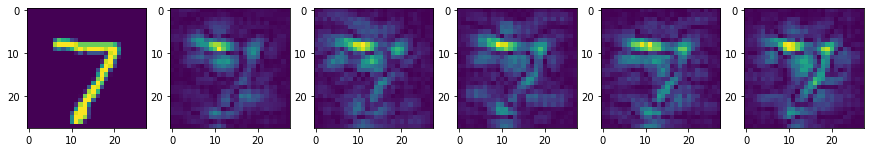

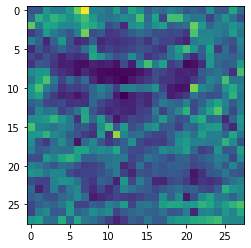

0.5320026030007806


In [9]:
example_maps = generate_saliency_maps_for_one_input(ensemble = MNIST_lenets,
                                                    input = MNIST_testX[0],
                                                    optimisers = MNIST_optimizers,
                                                    visualised_layer = 9)
visualize_saliency_maps(input = MNIST_testX[0].reshape(28,28), saliency_maps = example_maps)
plt.imshow(generate_uncertainty_map(saliency_maps = example_maps))
plt.show()
print(calculate_uncertainty_with_maps(example_maps))

In [10]:
MNIST_saliency_maps = generate_ensemble_saliency_maps_for_multiple_inputs(
    ensemble = MNIST_lenets,
    inputs = MNIST_testX,
    output_nodes = MNIST_outputs,
    optimisers = MNIST_optimizers,
    visualised_layer = 9)

MNIST_uncertainties = calculate_uncertainties_with_maps(MNIST_saliency_maps)
print(MNIST_uncertainties)

100%|██████████| 10000/10000 [00:36<00:00, 276.60it/s]


[0.5320026  0.55993377 0.59292776 ... 0.54764894 0.55730321 0.54232708]


In [11]:
print(calculate_uncertainty_for_one_input(ensemble = MNIST_lenets,
                                          input = MNIST_testX[0],
                                          optimisers = MNIST_optimizers,
                                          visualised_layer = 9))
MNIST_uncertainties = calculate_uncertainties_for_multiple_inputs(MNIST_lenets,MNIST_testX,MNIST_outputs,MNIST_optimizers,9)
print(MNIST_uncertainties)

  0%|          | 31/10000 [00:00<00:32, 308.61it/s]

0.5320026030007806


100%|██████████| 10000/10000 [00:34<00:00, 285.80it/s]


[0.5320026  0.55993377 0.59292776 ... 0.54764894 0.55730321 0.54232708]


DescribeResult(nobs=10000, minmax=(0.4987297691841069, 0.6676405600379951), mean=0.567834126460161, variance=0.0005372192444003238, skewness=0.25205940914565556, kurtosis=-0.03387229794136637)


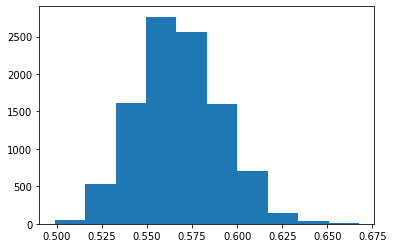

In [12]:
print(describe(MNIST_uncertainties))
plt.hist(MNIST_uncertainties)
plt.show()